In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#测试样本的数量
parameter=30

In [2]:
data=pd.DataFrame(index=range(0,parameter),columns=('probability','The true label'))
data['The true label']=np.random.randint(0,2,size=len(data))
data['probability']=np.random.choice(np.arange(0.1,1,0.1),len(data['probability']))

In [3]:
cm=np.arange(4).reshape(2,2)
cm[0,0]=len(data[data['The true label']==0][data['probability']<0.5])#TN
cm[0,1]=len(data[data['The true label']==0][data['probability']>=0.5])#FP
cm[1,0]=len(data[data['The true label']==1][data['probability']<0.5]) #FN
cm[1,1]=len(data[data['The true label']==1][data['probability']>=0.5])#TP

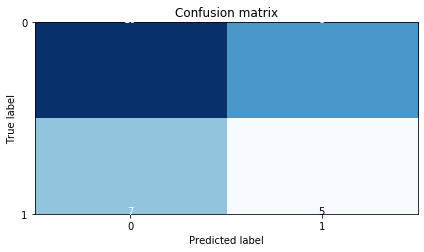

In [4]:
import itertools
classes = [0,1]
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in  itertools.product(range(cm.shape[0]), range(cm.shape[1])):    
    plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
data.sort_values('probability',inplace=True,ascending=False)
data

,probability,The true label
16,0.9,1
28,0.9,0
20,0.8,1
0,0.7,0
26,0.7,0
23,0.6,0
21,0.6,0
4,0.5,1
22,0.5,0
9,0.5,0


In [6]:
TPRandFPR=pd.DataFrame(index=range(len(data)),columns=('TP','FP'))
for j in range(len(data)):
    data1=data.head(n=j+1)
    FP=len(data1[data1['The true label']==0][data1['probability']>=data1.head(len(data1))['probability']])/float(len(data[data['The true label']==0]))
    TP=len(data1[data1['The true label']==1][data1['probability']>=data1.head(len(data1))['probability']])/float(len(data[data['The true label']==1]))
    TPRandFPR.iloc[j]=[TP,FP]

In [7]:
TPRandFPR

,TP,FP
0,0.0833333,0
1,0.0833333,0.0555556
2,0.166667,0.0555556
3,0.166667,0.111111
4,0.166667,0.166667
5,0.166667,0.222222
6,0.166667,0.277778
7,0.25,0.277778
8,0.25,0.333333
9,0.25,0.388889


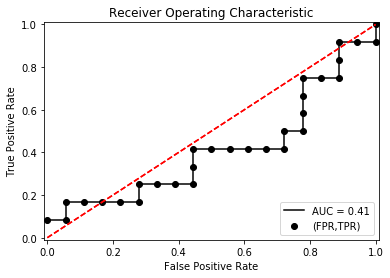

In [8]:
from sklearn.metrics import auc
AUC= auc(TPRandFPR['FP'],TPRandFPR['TP'])
plt.scatter(x=TPRandFPR['FP'],y=TPRandFPR['TP'],label='(FPR,TPR)',color='k')
plt.plot(TPRandFPR['FP'], TPRandFPR['TP'], 'k',label='AUC = %0.2f'% AUC)
plt.legend(loc='lower right')
plt.title('Receiver Operating Characteristic')
plt.plot([(0,0),(1,1)],'r--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,01.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()